#Homework 2: MNIST Digit Classification


<div dir='rtl'style="text-align: right;font-family:verdana;">

در این تکلیف هدف طراحی مدلی بر اساس شبکه‌های Fully Connected
برای حل مساله‌ی دسته‌بندی اعداد دست نویس است.
دیتاستی که در اختیار شما قرار داده شده است, دیتاست 
[MNIST](http://yann.lecun.com/exdb/mnist/) 
است
که شامل ۱۰ کلاس برای دسته‌بندی اعداد دست نویس ۰-۹ است.
در این دیتاست در مجموع ۷۰۰۰۰ تصویر برای تمام ۱۰ کلاس در نظر گرفته شده است که شامل ۶۰۰۰۰ تصویر برای آموزش و ۱۰۰۰۰ تصویر برای تست است.
اندازه‌ی تمام تصاویر در این دیتاست ۲۸*۲۸
می‌باشد.
شبکه‌ی طراحی شده باید بتواند تشخیص دهد که تصویر ورودی متعلق به کدام یک از این کلاس‌ها می‌باشد.
طراحی تعداد لایه‌های شبکه و تعداد نورون‌ها بر عهده شما می‌باشد.
ساختار شبکه‌ی مورد نظر با کراس در نظر گرفته شده است. در ساختار شبکه‌ی خود از لایه‌ی 
[Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
برای یکسان سازی ابعاد ورودی به مدل خود استفاده کنید.
در نهایت دقت مدل را براساس معیارهای
Accuracy, Precision, Recall
و
F1_measure 
 بدست آورید.

کد شروع در اختیار شما قرار داده شده است. شما موظف هستید قسمت‌هایی که با TODO نشان داده شده است را به بهترین نحو پر کنید تا به دقت بالایی در شبکه خود دست پیدا کنید.


<div dir='rtl'style="text-align: right;font-family:verdana;">

تاثیر موارد زیر را بر عملکرد مدلی که طراحی کرده‌اید بررسی و تحلیل کنید:


*   تعداد لایه‌های Fully Connected
*   تعداد نورون‌های هر لایه
* نرخ یادگیری و batch size
* توابع بهینه‌ساز
* تعداد داده‌های آموزشی و تست

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import random

2021-12-01 17:56:04.425392: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


## 1.1 MNIST dataset 


In [2]:
mnist = tf.keras.datasets.mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_X = (np.expand_dims(train_X, axis=-1)/255.).astype(np.float32)
train_Y = (train_Y).astype(np.int64)
test_X = (np.expand_dims(test_X, axis=-1)/255.).astype(np.float32)
test_Y = (test_Y).astype(np.int64)

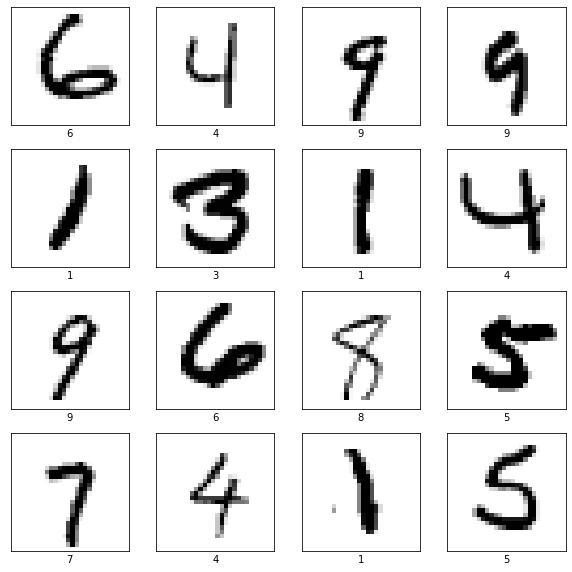

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    img_index = random_inds[i]
    plt.imshow(np.squeeze(train_X[img_index]), cmap=plt.cm.binary)
    plt.xlabel(train_Y[img_index])

## 1.2 Neural Network for Handwritten Digit Classification


In [4]:
# your model
def Model_fc(neuron_in_each_hidden_layer,act): 
  fully_connected_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
  ])

  for n in neuron_in_each_hidden_layer:
    fully_connected_model.add(tf.keras.layers.Dense(n,activation=act));

  fully_connected_model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
  return fully_connected_model

model = Model_fc([256,256],act='relu')

2021-12-01 17:56:06.646404: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-12-01 17:56:06.979329: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:968] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-01 17:56:06.979410: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.35GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 241.85GiB/s
2021-12-01 17:56:06.979456: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-12-01 17:56:06.991753: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-12-01 17:56:06.996382: I tensorflow/stream_executor

<div dir='rtl'style="text-align: right;font-family:verdana;">

در هنگام
[compile](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) 
کردن
باید برخی از خصوصیات مورد نیاز هنگام آموزش شبکه مانند تابع
هزینه,
تابع بهینه‌ساز و معیار برای اندازه‌گیری دقت شبکه
 مشخص شوند. تاثیر این موارد را در آموزش شبکه مورد بررسی قرار دهید.

In [5]:
# lr = 0.001
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss='categorical_crossentropy',metrics=['accuracy'])

### Train the model



<div dir='rtl'style="text-align: right;font-family:verdana;">

با فراخوانی تابع
[fit](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit)
می‌توانید مدل خود را بر روی داده‌های دیتاست آموزش دهید. آموزش در تعداد epochها
 و اندازه‌ی bacthهای مناسب انجام می‌شود.
 تاثیر تغییر تعداد اوپوک و batch size
 را مورد بررسی قرار دهید و نتایج را بیان کنید.

In [6]:
# epochs = 1
# batch_sizes = 2048

# trainn = tf.keras.utils.to_categorical(train_Y)
# testt = tf.keras.utils.to_categorical(test_Y)

# model.fit(train_X,trainn,batch_size=batch_sizes,epochs=epochs)

In [7]:

def scores(y_true, y_pred):
    y_true = tf.argmax(y_true,axis=1)
    y_pred = tf.argmax(y_pred,axis=1)
    table = np.full((10,10),tf.keras.backend.epsilon())

    for i in range(len(y_true)):
        table[y_pred[i],y_true[i]] += 1
        
    acc = np.trace(table)/np.sum(table)
    
    rcls = np.zeros(10)

    for i in range(10):
        rcls[i] = table[i,i]/np.sum(table[i,:])
    
    # print(f"recall for each digit is: {rcls}")

    prcs = np.zeros(10)

    for i in range(10):
        prcs[i] = table[i,i]/np.sum(table[:,i])

    # print(f"precision for each digit is: {prcs}")

    f1 = np.zeros(10)

    for i in range(10):
        f1[i] = 2*(rcls[i]*prcs[i])/(rcls[i]+prcs[i])

    # print(f"f1-score for each digit is: {f1}")

    return acc,np.mean(rcls),np.mean(prcs),np.mean(f1)


In [8]:
lrs = [1e-2,1e-3]
layers = [
    [255,],
    [64,32],
    [32,32,32],
]
epochs = [10,50]
batch_sizes = [128,512,2048]
act = ['sigmoid','relu']
trainn = tf.keras.utils.to_categorical(train_Y)
testt = tf.keras.utils.to_categorical(test_Y)

import sys
original = sys.stdout
sys.stdout = open('comparison_result.txt','w')

for e in epochs:
    print(f"epochs = {e}")
    for lr in lrs:
        print(f"\tlearning rate = {lr}")
        for l in layers:
            print(f"\t\tlayers = {l}")
            for a in act:
                print(f"\t\t\tactivation = {a}")
                for b in batch_sizes:
                    print(f"\t\t\t\tbatch size = {b}")
                    model = Model_fc(l,a)
                    model.compile(tf.keras.optimizers.Adam(learning_rate=lr),loss='categorical_crossentropy')
                    model.fit(train_X,trainn,b,e,0)
                    pred = model(test_X)
                    acc,rcl,prc,f1 = scores(testt,pred)
                    print(f"\t\t\t\t\tAdam=> acc: {acc:.3f}, avg recall: {rcl:.3f}, avg precision: {prc:.3f}, avg f1: {f1:.3f}")

                    model2 = Model_fc(l,a)
                    model2.compile(tf.keras.optimizers.SGD(learning_rate=lr),loss='categorical_crossentropy')
                    model2.fit(train_X,trainn,b,e,0)
                    pred = model2(test_X)
                    acc,rcl,prc,f1 = scores(testt,pred)
                    print(f"\t\t\t\t\tSGD => acc: {acc:.3f}, avg recall: {rcl:.3f}, avg precision: {prc:.3f}, avg f1: {f1:.3f}")         

sys.stdout = original       
                

### Evaluate accuracy on the test dataset


In [9]:
# '''TODO: Use the evaluate method to test the model!'''
# score = # TODO

# print('Test score: ', score[0])
# print('Test accuracy: ', score[1])
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

<div dir='rtl'style="text-align: right;font-family:verdana;">

# نتایج

#### بعد از اجرای کد نتایج در فایل comparison_result.txt در کنار همین فایل قرار می‌گیرند

#### معیارهای Accuracy، Recall، Precision و F1-score روی داده‌های تست بررسی شده‌اند

#### لایه‌ی خروجی همواره ده نورون داشته و تابع فعال‌ساز آن sigmoid بوده است.

### تاثیر الگوریتم بهینه سازی
دو الگوریتم
SGD
و
Adam
برای این مسئله مورد استفاده قرار گرفتند که در همه (به جز چند مورد خاص) الگوریتم
Adam
به عملکرد بهتری با در نظر گرفتن هر چهار معیار رسید. در ضمن نکته‌ی قابل توجه بعدی نیز این است که الگوریتم
Adam
وابستگی کمتری با سایر هایپرپارامترها دارد که در ادامه با بررسی هر کدوم متوجه آن می‌شویم.

### تاثیر تابع فعالساز
دو تابع فعال‌ساز
relu
و
sigmoid
مورد آزمایش قرار گرفتند که زمانی که از بهینه ساز
Adam
استفاده میشد فرق چندانی در عملکرد این دو وجود نداشت (در برخی موارد 
relu
اندکی بهتر عملکرد میکرد)
اما زمانی که الگوریتم بهینه‌ساز
SGD
بود، تابع فعالساز
relu
عملکردی بسیار بهتر در اکثر موارد داشت.

### تاثیر تعداد لایه‌ها و تعداد نورون‌ها در هر لایه
برای بررسی این موضوع از شبکه‌‌هایی با یک لایه مخفی با ۲۵۶ نورون، دولایه با ۶۴ و ۳۲ نورون و سه لایه با هر کدام ۳۲ نورون استفاده شد.
در الگوریتم
Adam
تفاوت زیادی بین این چند نوع نبود (شبکه با یک لایه‌ی ۲۵۶ نورونی در برخی موارد اندکی عملکرد بهتر داشت)
اما در الگوریتم
SGD
در بیشتر موارد عملکرد نوع اول بهتر از دوم و نوع دوم بهتر از سوم بود.

### تاثیر نرخ یادگیری
از دو نرخ یادگیری 0.01 و 0.001 برای آموزش شبکه استفاده شد که هنگام استفاده از الگوریتم
Adam
تاثیر چندانی در عملکرد شبکه با جابه جایی این دو ایجاد نمیشد اما هنگام استفاده از الگوریتم 
SGD
هنگامی که از تعداد ایپاک کمتری استفاده میشد عملکرد 0.01 بسیار بهتر از عمکرد 0.001 بود. در تعداد ایپاک بیشتر همچنان این موضوع برقرار بود با این تفاوت که اختلاف عمکرد کمتر میشد.

### تاثیر batch size
از
batch
هایی با سایز‌های ۱۲۸، ۶۱۲ و ۲۰۴۸ استفاده شد که در الگوریتم
Adam
تاثیر چندانی وجود نداشت
اما هنگامی که الگوریتم بهینه ساز
SGD
بود عملکرد 128 بهتر از بقیه بود که البته دلیل آن شاید کم بودن تعداد ایپاک‌ها باشد. زیرا با
batch size
کوچکتر الگوریتم بهینه ساز بیشتر اجرا می‌شود که در این صورت زودتر همگرا می‌شود.


### تعداد epoch
برای مقدار ایپاک از ۱۰ و ۵۰ استفاده شد که در الگوریتم
Adam
باز هم تغییر آن تاثیر چندانی روی عملکرد نمی‌گذاشت اما در الگوریتم
SGD
به طور میانگین ایپاک بیشتر عملکرد شبکه را بهتر می‌کرد الخصوص زمانی که نرخ یادگیری کم بود.

